<a target="_blank" href="https://colab.research.google.com/drive/12d7LycLAYO2bFsBo_jtPHXSaIg7AqR3O?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🕷️ Extract Company Info with Official Scrapegraph SDK

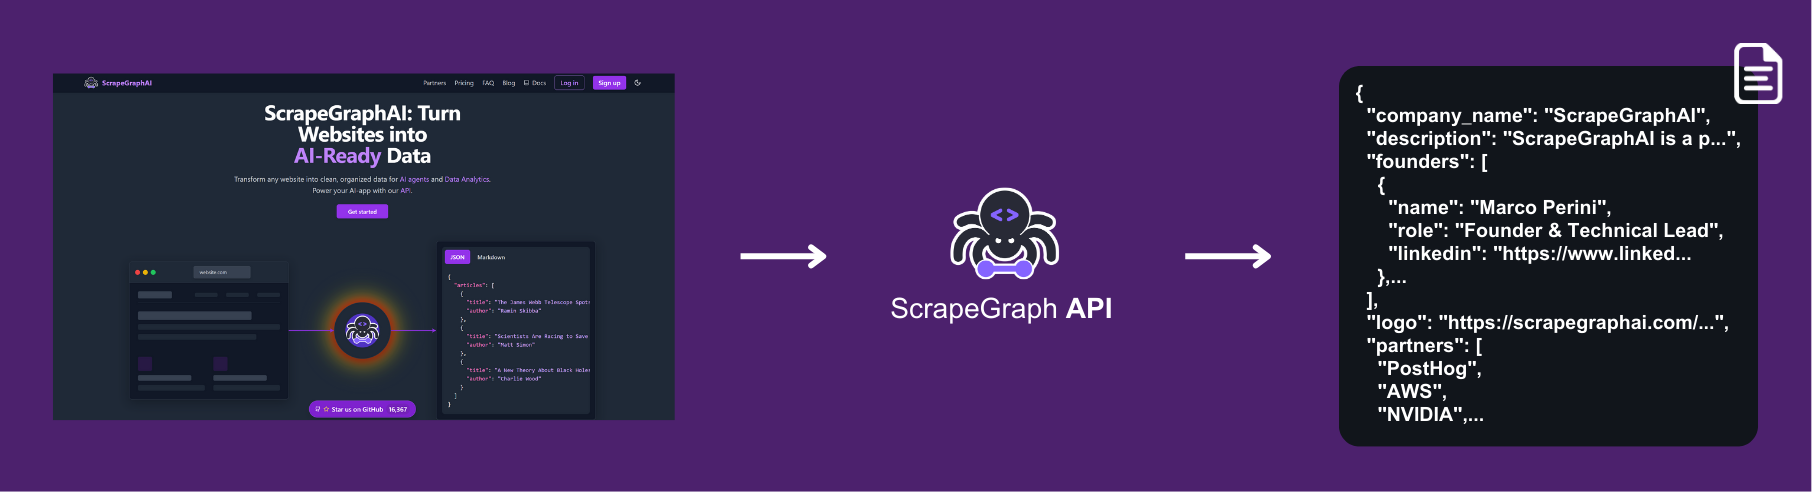

### 🔧 Install `dependencies`

In [2]:
%%capture
!pip install scrapegraph-py

### 🔑 Import `ScrapeGraph` API key

You can find the Scrapegraph API key [here](https://dashboard.scrapegraphai.com/)

In [3]:
import os
from getpass import getpass

# Check if the API key is already set in the environment
sgai_api_key = os.getenv("SGAI_API_KEY")

if sgai_api_key:
    print("SGAI_API_KEY found in environment.")
else:
    print("SGAI_API_KEY not found in environment.")
    # Prompt the user to input the API key securely (hidden input)
    sgai_api_key = getpass("Please enter your SGAI_API_KEY: ").strip()
    if sgai_api_key:
        # Set the API key in the environment
        os.environ["SGAI_API_KEY"] = sgai_api_key
        print("SGAI_API_KEY has been set in the environment.")
    else:
        print("No API key entered. Please set the API key to continue.")


SGAI_API_KEY not found in environment.
Please enter your SGAI_API_KEY: ··········
SGAI_API_KEY has been set in the environment.


### 📝 Defining an `Output Schema` for Webpage Content Extraction


If you already know what you want to extract from a webpage, you can **define an output schema** using **Pydantic**. This schema acts as a "blueprint" that tells the AI how to structure the response.

<details>
  <summary>Pydantic Schema Quick Guide</summary>

Types of Schemas  

1. Simple Schema  
Use this when you want to extract straightforward information, such as a single piece of content.  

```python
from pydantic import BaseModel, Field

# Simple schema for a single webpage
class PageInfoSchema(BaseModel):
    title: str = Field(description="The title of the webpage")
    description: str = Field(description="The description of the webpage")

# Example Output JSON after AI extraction
{
    "title": "ScrapeGraphAI: The Best Content Extraction Tool",
    "description": "ScrapeGraphAI provides powerful tools for structured content extraction from websites."
}
```

2. Complex Schema (Nested)  
If you need to extract structured information with multiple related items (like a list of repositories), you can **nest schemas**.

```python
from pydantic import BaseModel, Field
from typing import List

# Define a schema for a single repository
class RepositorySchema(BaseModel):
    name: str = Field(description="Name of the repository (e.g., 'owner/repo')")
    description: str = Field(description="Description of the repository")
    stars: int = Field(description="Star count of the repository")
    forks: int = Field(description="Fork count of the repository")
    today_stars: int = Field(description="Stars gained today")
    language: str = Field(description="Programming language used")

# Define a schema for a list of repositories
class ListRepositoriesSchema(BaseModel):
    repositories: List[RepositorySchema] = Field(description="List of GitHub trending repositories")

# Example Output JSON after AI extraction
{
    "repositories": [
        {
            "name": "google-gemini/cookbook",
            "description": "Examples and guides for using the Gemini API",
            "stars": 8036,
            "forks": 1001,
            "today_stars": 649,
            "language": "Jupyter Notebook"
        },
        {
            "name": "TEN-framework/TEN-Agent",
            "description": "TEN Agent is a conversational AI powered by TEN, integrating Gemini 2.0 Multimodal Live API, OpenAI Realtime API, RTC, and more.",
            "stars": 3224,
            "forks": 311,
            "today_stars": 361,
            "language": "Python"
        }
    ]
}
```

Key Takeaways  
- **Simple Schema**: Perfect for small, straightforward extractions.  
- **Complex Schema**: Use nesting to extract lists or structured data, like "a list of repositories."  

Both approaches give the AI a clear structure to follow, ensuring that the extracted content matches exactly what you need.
</details>


In [1]:
from pydantic import BaseModel, Field
from typing import List, Dict, Optional

# Schema for founder information
class FounderSchema(BaseModel):
    name: str = Field(description="Name of the founder")
    role: str = Field(description="Role of the founder in the company")
    linkedin: str = Field(description="LinkedIn profile of the founder")

# Schema for pricing plans
class PricingPlanSchema(BaseModel):
    tier: str = Field(description="Name of the pricing tier")
    price: str = Field(description="Price of the plan")
    credits: int = Field(description="Number of credits included in the plan")

# Schema for social links
class SocialLinksSchema(BaseModel):
    linkedin: str = Field(description="LinkedIn page of the company")
    twitter: str = Field(description="Twitter page of the company")
    github: str = Field(description="GitHub page of the company")

# Schema for company information
class CompanyInfoSchema(BaseModel):
    company_name: str = Field(description="Name of the company")
    description: str = Field(description="Brief description of the company")
    founders: List[FounderSchema] = Field(description="List of company founders")
    logo: str = Field(description="Logo URL of the company")
    partners: List[str] = Field(description="List of company partners")
    pricing_plans: List[PricingPlanSchema] = Field(description="Details of pricing plans")
    contact_emails: List[str] = Field(description="Contact emails of the company")
    social_links: SocialLinksSchema = Field(description="Social links of the company")
    privacy_policy: str = Field(description="URL to the privacy policy")
    terms_of_service: str = Field(description="URL to the terms of service")
    api_status: str = Field(description="API status page URL")

### 🚀 Initialize `SGAI Client` and start extraction

Initialize the client for scraping (there's also an async version [here](https://github.com/ScrapeGraphAI/scrapegraph-sdk/blob/main/scrapegraph-py/examples/async_smartscraper_example.py))

In [4]:
from scrapegraph_py import Client

# Initialize the client with explicit API key
sgai_client = Client(api_key=sgai_api_key)

Here we use `Smartscraper` service to extract structured data using AI from a webpage.


> If you already have an HTML file, you can upload it and use `Localscraper` instead.





In [5]:
# Request for Trending Repositories
repo_response = sgai_client.smartscraper(
    website_url="https://scrapegraphai.com/",
    user_prompt="Extract info about the company",
    output_schema=CompanyInfoSchema,
)

Print the response

In [6]:
import json

# Print the response
request_id = repo_response['request_id']
result = repo_response['result']

print(f"Request ID: {request_id}")
print("Company Info:")
print(json.dumps(result, indent=2))

Request ID: 87a7ea1a-9dd4-4d1d-ae76-b419ead57c11
Company Info:
{
  "company_name": "ScrapeGraphAI",
  "description": "ScrapeGraphAI is a powerful AI scraping API designed for efficient web data extraction to power LLM applications and AI agents. It enables developers to perform intelligent AI scraping and extract structured information from websites using advanced AI techniques.",
  "founders": [
    {
      "name": "Marco Perini",
      "role": "Founder & Technical Lead",
      "linkedin": "https://www.linkedin.com/in/perinim/"
    },
    {
      "name": "Marco Vinciguerra",
      "role": "Founder & Software Engineer",
      "linkedin": "https://www.linkedin.com/in/marco-vinciguerra-7ba365242/"
    },
    {
      "name": "Lorenzo Padoan",
      "role": "Founder & Product Engineer",
      "linkedin": "https://www.linkedin.com/in/lorenzo-padoan-4521a2154/"
    }
  ],
  "logo": "https://scrapegraphai.com/images/scrapegraphai_logo.svg",
  "partners": [
    "PostHog",
    "AWS",
    "NVIDI

### 💾 Save the output to a `CSV` file

Let's create a pandas dataframe and show the tables with the extracted content

In [9]:
import pandas as pd

# Flatten and save main company information
company_info = {
    "company_name": result["company_name"],
    "description": result["description"],
    "logo": result["logo"],
    "contact_emails": ", ".join(result["contact_emails"]),
    "privacy_policy": result["privacy_policy"],
    "terms_of_service": result["terms_of_service"],
    "api_status": result["api_status"],
    "linkedin": result["social_links"]["linkedin"],
    "twitter": result["social_links"]["twitter"],
    "github": result["social_links"].get("github", None)
}

# Creating dataframes
df_company = pd.DataFrame([company_info])
df_founders = pd.DataFrame(result["founders"])
df_pricing = pd.DataFrame(result["pricing_plans"])
df_partners = pd.DataFrame({"partner": result["partners"]})

Show flattened tables

In [10]:
df_company

,company_name,description,logo,contact_emails,privacy_policy,terms_of_service,api_status,linkedin,twitter,github
0,ScrapeGraphAI,ScrapeGraphAI is a powerful AI scraping API de...,https://scrapegraphai.com/images/scrapegraphai...,contact@scrapegraphai.com,https://scrapegraphai.com/privacy,https://scrapegraphai.com/terms,https://scrapegraphapi.openstatus.dev,https://www.linkedin.com/company/101881123,https://x.com/scrapegraphai,https://github.com/ScrapeGraphAI/Scrapegraph-ai


In [11]:
df_founders

,name,role,linkedin
0,Marco Perini,Founder & Technical Lead,https://www.linkedin.com/in/perinim/
1,Marco Vinciguerra,Founder & Software Engineer,https://www.linkedin.com/in/marco-vinciguerra-...
2,Lorenzo Padoan,Founder & Product Engineer,https://www.linkedin.com/in/lorenzo-padoan-452...


In [12]:
df_pricing

,tier,price,credits
0,Free,$0,100
1,Starter,$20/month,5000
2,Growth,$100/month,40000
3,Pro,$500/month,250000


In [13]:
df_partners

,partner
0,PostHog
1,AWS
2,NVIDIA
3,JinaAI
4,DagWorks
5,Browserbase
6,ScrapeDo
7,HackerNews
8,Medium
9,HackADay


Save the results to CSV

In [14]:
# Save the DataFrames to a CSV file
df_company.to_csv("company_info.csv", index=False)
df_founders.to_csv("founders.csv", index=False)
df_pricing.to_csv("pricing_plans.csv", index=False)
df_partners.to_csv("partners.csv", index=False)
# Print confirmation
print("Data saved to CSV files")


Data saved to CSV files


## 🔗 Resources


<p align="left">
  <img src="https://raw.githubusercontent.com/VinciGit00/Scrapegraph-ai/main/docs/assets/api-banner.png"
       alt="ScrapeGraph API Banner" width="600">
</p>


- 🚀 **Get your API Key:** [ScrapeGraphAI Dashboard](https://dashboard.scrapegraphai.com)  
- 🐙 **GitHub:** [ScrapeGraphAI GitHub](https://github.com/scrapegraphai)  
- 💼 **LinkedIn:** [ScrapeGraphAI LinkedIn](https://www.linkedin.com/company/scrapegraphai/)  
- 🐦 **Twitter:** [ScrapeGraphAI Twitter](https://twitter.com/scrapegraphai)  
- 💬 **Discord:** [Join our Discord Community](https://discord.gg/uJN7TYcpNa)  

Made with ❤️ by the [ScrapeGraphAI](https://scrapegraphai.com) Team  
